In [1]:
from main import DataLoader
from main import DataHandler
from main import googleapi
from main import npiapi
from matplotlib import pyplot as plt
from scipy.stats import linregress
import numpy as np
from sklearn import datasets
from pandas.io.json import json_normalize
import pandas as pd
import json
import gmaps
import requests
from config import googlekey
from ipywidgets.embed import embed_minimal_html

In [2]:
from main import FileHospitalCDData
from main import FileHospitalCDHData
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [5]:
CDData=pd.DataFrame(DataLoader.LoadFile(FileHospitalCDData))
CDHData=pd.DataFrame(DataLoader.LoadFile(FileHospitalCDHData))

In [10]:
CDHData.head(5)

,Facility ID,Facility Name,Address,City,State,ZIP Code,County Name,Phone Number,Measure ID,Measure Name,Compared to National,Denominator,Score,Lower Estimate,Higher Estimate,Footnote,Start Date,End Date
0,010001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,(334) 793-8701,COMP_HIP_KNEE,Rate of complications for hip/knee replacement...,No Different Than the National Rate,292,3.2,2.1,4.8,NaN,04/01/2015,03/31/2018
1,010001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,(334) 793-8701,MORT_30_AMI,Death rate for heart attack patients,No Different Than the National Rate,688,13,11.0,15.5,NaN,07/01/2015,06/30/2018
2,010001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,(334) 793-8701,MORT_30_CABG,Death rate for CABG surgery patients,No Different Than the National Rate,291,4.3,2.6,6.8,NaN,07/01/2015,06/30/2018
3,010001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,(334) 793-8701,MORT_30_COPD,Death rate for COPD patients,No Different Than the National Rate,411,8.8,6.7,11.4,NaN,07/01/2015,06/30/2018
4,010001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,(334) 793-8701,MORT_30_HF,Death rate for heart failure patients,No Different Than the National Rate,869,12.7,10.7,15.0,NaN,07/01/2015,06/30/2018


In [11]:
CDHData = CDHData[["Facility ID","Facility Name","Address","City","State","ZIP Code","Measure ID","Compared to National","Denominator","Score"]]

In [12]:
CDHData.head(5)

,Facility ID,Facility Name,Address,City,State,ZIP Code,Measure ID,Compared to National,Denominator,Score
0,010001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,COMP_HIP_KNEE,No Different Than the National Rate,292,3.2
1,010001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,MORT_30_AMI,No Different Than the National Rate,688,13
2,010001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,MORT_30_CABG,No Different Than the National Rate,291,4.3
3,010001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,MORT_30_COPD,No Different Than the National Rate,411,8.8
4,010001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,MORT_30_HF,No Different Than the National Rate,869,12.7


In [22]:
CDHData_GroupMeasure=CDHData
CDHData_GroupMeasure=CDHData_GroupMeasure.loc[CDHData_GroupMeasure["Denominator"] != 'Not Available']

In [56]:
CDHData_GroupMeasure["Denominator"]=CDHData_GroupMeasure["Denominator"].astype(np.int64)

C:\ProgramData\Anaconda3\envs\Pythondata\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [82]:
DS_Measures=pd.DataFrame(CDHData_GroupMeasure.groupby("Measure ID")["Denominator"].sum())
DS_Measures=(DS_Measures).sort_values(by="Denominator")
DS_Measures

,Denominator
Measure ID,
MORT_30_CABG,134272
PSI_4_SURG_COMP,208513
MORT_30_AMI,472901
MORT_30_STK,494219
MORT_30_COPD,697979
COMP_HIP_KNEE,974073
MORT_30_HF,1033458
PSI_14_POSTOP_DEHIS,1082369
MORT_30_PN,1307217


In [78]:
Facility_Group=CDHData_GroupMeasure.groupby("Facility Name")
DS_Hopital=pd.DataFrame(Facility_Group["Denominator"].sum())
DS_Hopital=(DS_Hopital).sort_values(by="Denominator")
HR=DS_Hopital.tail(20)
LR=DS_Hopital.head(20)

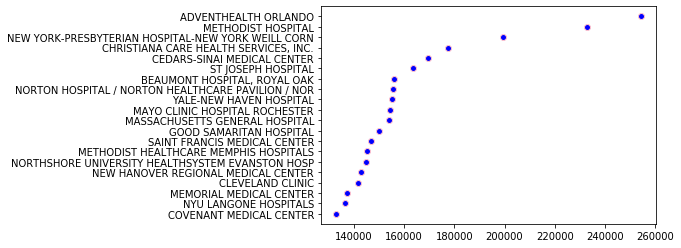

In [81]:
plt.scatter(HR['Denominator'],HR.index,marker="o",color="blue",edgecolor="pink")
plt.show()

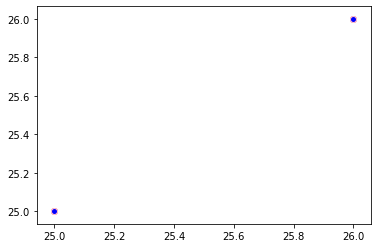

In [80]:
plt.scatter(LR['Denominator'],LR.index,marker="o",color="blue",edgecolor="pink")
plt.show()

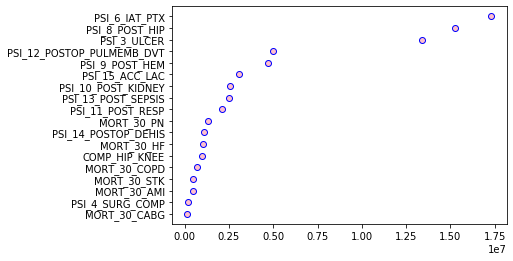

In [73]:
plt.scatter(DS_Measures['Denominator'],DS_Measures.index,marker="o",color="pink",edgecolor="blue")
plt.show()